# PIMA Indian Diabetes

The Pima Indians diabeties data has 768 instances, each instance having 8 attributes with which the patients were medically tested upon. Using the data of the tested patients, based on the 8 attributes, we use different classfication ML techniques to predict if the patient is actually a diabetic or not.
The attributes on which the patients were tested are:
1)Pregnencies
2)Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3)Diastolic blood pressure (mm Hg)
4)Triceps skin fold thickness (mm)
5)2-Hour serum insulin (mu U/ml)
6)BMI: Body mass index (weight in kg/(height in m)^2)
7)Diabetes pedigree function
8)Age (In years)

Finally the 9th column is terms of 0 and 1, 1: Tested positive for diabetes, 0: tested negative for diabetes
preg = Number of times pregnant




We start of by importing the required libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns


Importing the data from pima-indians-diabetes.csv using pandas into the atrributes the patients were tested upon.
We have a look at the data using .head() method

In [5]:
All_features=['Pregnencies','PlasmaGlucose','DBP','Skin_thickness','insulin','BMI','DPedigreeFn','Age','Diabetic']
dataset=pd.read_csv("F:\cellstrat\ML\module 6\pima-indians-diabetes.data", names=All_features)
dataset.head()



,Pregnencies,PlasmaGlucose,DBP,Skin_thickness,insulin,BMI,DPedigreeFn,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now we look at the data description to find out if there any missing values and the trend in the data


In [6]:
dataset.describe()

,Pregnencies,PlasmaGlucose,DBP,Skin_thickness,insulin,BMI,DPedigreeFn,Age,Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Thankfully, there are no missing values.
Now we look upon the data for any corelation between the paramters

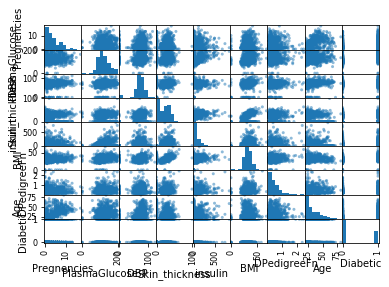

In [7]:
X_array=dataset.iloc[: ,:-1].values
Y_array=dataset['Diabetic'].values
X_features=['Pregnencies','PlasmaGlucose','DBP','Skin_thickness','insulin','BMI','DPedigreeFn','Age']
scatter_matrix(dataset)
plt.xticks(rotation='vertical')
# plt.ylabels(rotation=60)
plt.show()



The distribution is more or less random. We cannot make out any corelation from the above distributions


Now we normalize the data between 0 to 1 usinf MinMaxScaler, so that all out input features are have equalimportance for prediction

In [8]:
Scalar=preprocessing.MinMaxScaler()
Scaled_X=Scalar.fit_transform(X_array)
Scaled_X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

Lets split the data into testing and training samples.

In [9]:
from sklearn.model_selection import train_test_split
(train_input,test_input,train_output,test_output)=train_test_split(Scaled_X,Y_array,train_size=0.75,random_state=31)

### K-Near Neighbors

Lets start witk K-nearest neighbors model

In [10]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_input,train_output)
y_pred=knn.predict(test_input)
knn.score(test_input,test_output)


0.71875

By varying the neighbors we can get better results 

In [11]:
knn_scores=[]
a=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_input,train_output)
    knn_scores.append(knn.score(test_input,test_output))
    a.append(k)
    
q=knn_scores.index(max(knn_scores))+1
maxi=max(knn_scores)
print("The best result was obtained for k : %d is %.2f" %(q,maxi))

The best result was obtained for k : 35 is 0.76


### Decision Tress and Random forest

Now lets use Decision tress and random forest to check out the accuracy of the model

In [12]:
DecTree=DecisionTreeClassifier(random_state=31)
DecResult=DecTree.fit(train_input,train_output)
DecTree.score(test_input,test_output)

0.703125

Lets plot the decision tree classifier

G:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


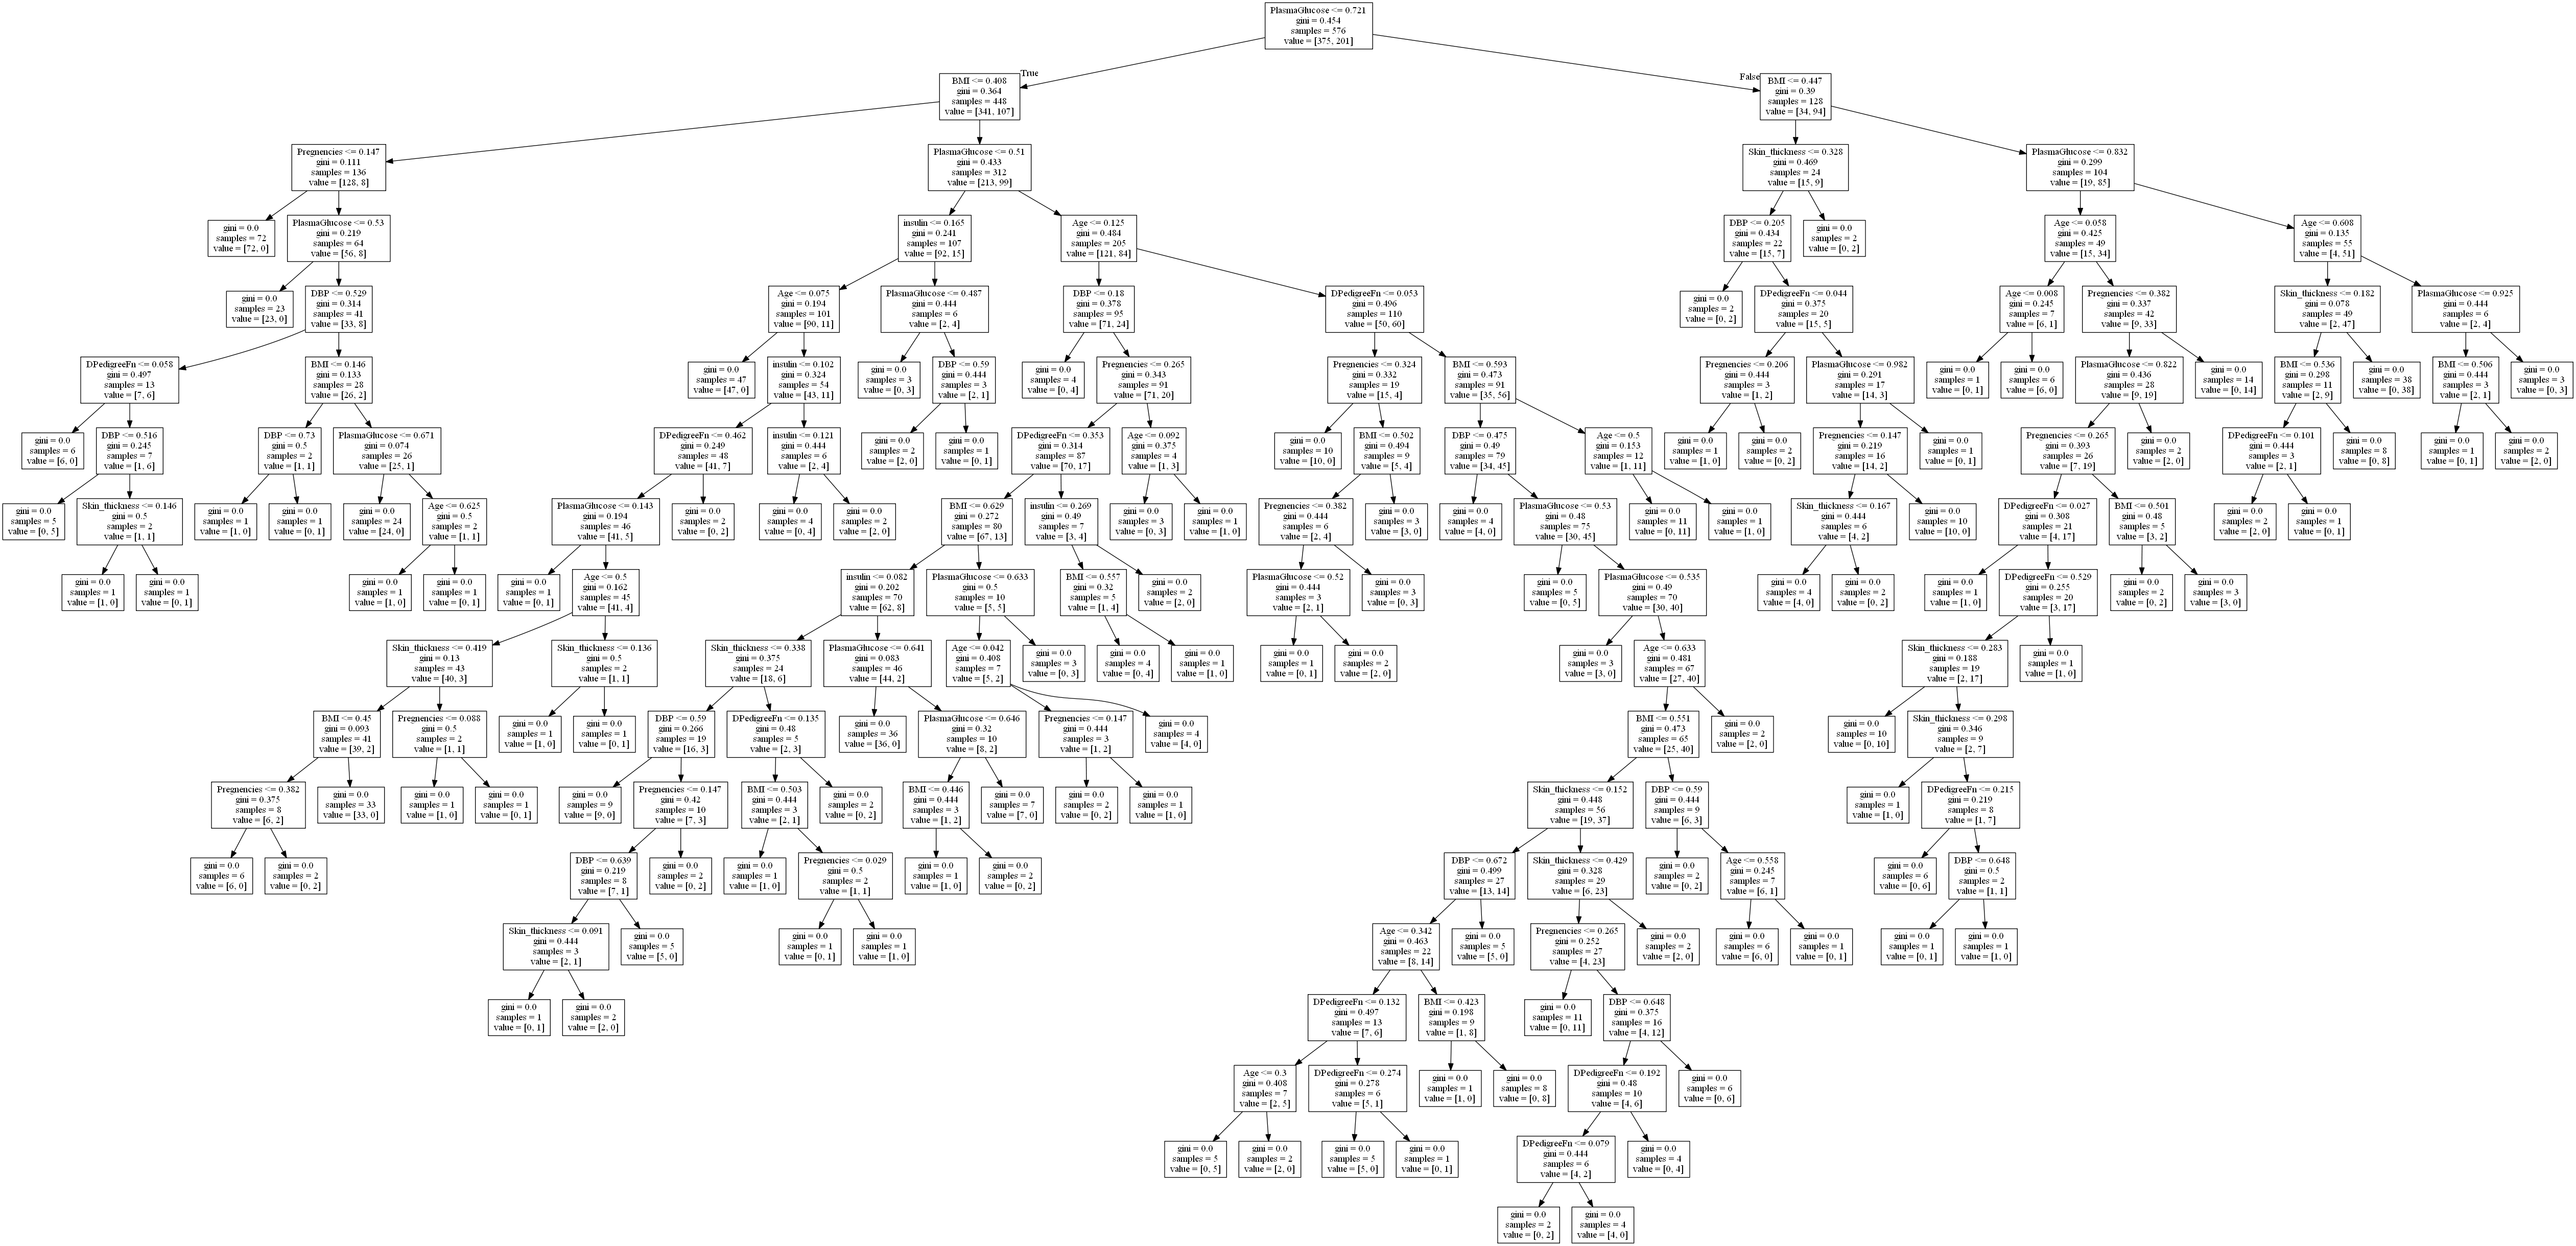

In [13]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(DecResult, out_file=dot_data,  
                         feature_names=X_features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

The accuracy with decision tress is stil quite less. So lets try with Random forest which is a form ensenble learning. It selected random tress from the lot and takes the average to give better results.

In [14]:
RandFor=RandomForestClassifier(n_estimators=10)
RandForRes=RandFor.fit(train_input,train_output)
RandForRes.score(test_input,test_output)


0.7291666666666666

Much better than our Decision tree results. Lets try if the results actually change by taking different n_estimators

In [15]:
scores=[]
for n in range(5,50):
    RandFor=RandomForestClassifier(n_estimators=n)
    RandForRes=RandFor.fit(train_input,train_output)
    scores.append(RandForRes.score(test_input,test_output))
maxi=max(scores)    
t=scores.index(max(scores))+1
print("The maximum accuracy was obtained for %d estimators as %.2f" %(t,maxi))
    

The maximum accuracy was obtained for 27 estimators as 0.80


### Support vector machines

Lets try Support vector machines for classification and see how well the hyperplane can classify the diabetics

In [16]:
svm_linear = SVC(kernel='linear',C=1,gamma='scale')
svm_linear.fit(train_input,train_output)
svm_linear.score(test_input,test_output)

0.7604166666666666

Lets try with other kernels

In [17]:
svm_polynomial= SVC(kernel='poly',C=1,gamma='scale')
svm_polynomial.fit(train_input,train_output)
svm_polynomial.score(test_input,test_output)

0.7708333333333334

In [18]:
svm_rbf= SVC(kernel='rbf',C=1,gamma='scale')
svm_rbf.fit(train_input,train_output)
svm_rbf.score(test_input,test_output)

0.7760416666666666

Using rbf kernel we get the better results in case of SVM's

### Logistic regression

Let's now try logistic regression, the simplest binary classification model when compared to all the other models

In [19]:
LR=LogisticRegression(solver='newton-cg')
LR.fit(train_input,train_output)
LR.score(test_input,test_output)

0.7760416666666666

Just by using an appropriate solver, we got the best results when compared all the other classfication models.

### Deep Neural Network

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense, Dropout

model=Sequential()
model.add(Dense(512,input_dim=8,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

NN=model.fit(train_input,train_output,batch_size=100,epochs=100,verbose=2,validation_data=(test_input,test_output))

Train on 576 samples, validate on 192 samples
Epoch 1/100
576/576 - 1s - loss: 0.6879 - accuracy: 0.6059 - val_loss: 0.6819 - val_accuracy: 0.6510
Epoch 2/100
576/576 - 0s - loss: 0.6767 - accuracy: 0.6510 - val_loss: 0.6683 - val_accuracy: 0.6510
Epoch 3/100
576/576 - 0s - loss: 0.6652 - accuracy: 0.6510 - val_loss: 0.6601 - val_accuracy: 0.6510
Epoch 4/100
576/576 - 0s - loss: 0.6611 - accuracy: 0.6510 - val_loss: 0.6558 - val_accuracy: 0.6510
Epoch 5/100
576/576 - 0s - loss: 0.6606 - accuracy: 0.6510 - val_loss: 0.6501 - val_accuracy: 0.6510
Epoch 6/100
576/576 - 0s - loss: 0.6549 - accuracy: 0.6510 - val_loss: 0.6437 - val_accuracy: 0.6510
Epoch 7/100
576/576 - 0s - loss: 0.6422 - accuracy: 0.6510 - val_loss: 0.6371 - val_accuracy: 0.6510
Epoch 8/100
576/576 - 0s - loss: 0.6375 - accuracy: 0.6510 - val_loss: 0.6245 - val_accuracy: 0.6510
Epoch 9/100
576/576 - 0s - loss: 0.6267 - accuracy: 0.6545 - val_loss: 0.6103 - val_accuracy: 0.6562
Epoch 10/100
576/576 - 0s - loss: 0.6133 - ac

Epoch 81/100
576/576 - 0s - loss: 0.4313 - accuracy: 0.7951 - val_loss: 0.5007 - val_accuracy: 0.7812
Epoch 82/100
576/576 - 0s - loss: 0.4169 - accuracy: 0.8160 - val_loss: 0.5052 - val_accuracy: 0.7708
Epoch 83/100
576/576 - 0s - loss: 0.4246 - accuracy: 0.7865 - val_loss: 0.5098 - val_accuracy: 0.7656
Epoch 84/100
576/576 - 0s - loss: 0.4243 - accuracy: 0.7986 - val_loss: 0.5032 - val_accuracy: 0.7708
Epoch 85/100
576/576 - 0s - loss: 0.4339 - accuracy: 0.7847 - val_loss: 0.5043 - val_accuracy: 0.7760
Epoch 86/100
576/576 - 0s - loss: 0.4444 - accuracy: 0.7865 - val_loss: 0.5067 - val_accuracy: 0.7760
Epoch 87/100
576/576 - 0s - loss: 0.4179 - accuracy: 0.7951 - val_loss: 0.4991 - val_accuracy: 0.7760
Epoch 88/100
576/576 - 0s - loss: 0.4209 - accuracy: 0.8003 - val_loss: 0.4975 - val_accuracy: 0.7760
Epoch 89/100
576/576 - 0s - loss: 0.4225 - accuracy: 0.8090 - val_loss: 0.5001 - val_accuracy: 0.7708
Epoch 90/100
576/576 - 0s - loss: 0.4125 - accuracy: 0.8038 - val_loss: 0.5026 - v

In [39]:
score=model.evaluate(test_input,test_output,verbose=0)
Accuracy=score[1]
print("the accuracy obtained on using neural networks was %.2f" %(Accuracy))

the accuracy obtained on using neural networks was 0.78


It turns out that even with a complicated nerual network model we able to achieve only 78% accuracy, where are with a simple logistic regression model we achieved 77.60% accuracy.
I gues we can conclude that the most simple model gave almost the best accuracy. 